## Modeling (Attributes and Sentiment)

In [1]:
import pandas as pd
import numpy as np
import re
import datetime as dt
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# os.chdir('C:/Users/zzlen/OneDrive - Seattle University/MSBA/5. Fall 2022/BUAN 5510/Capstone Project/Yelp Review/JSON')

In [2]:
final_business = pd.read_csv('final_business_sentiment.csv')

In [3]:
final_business.shape

(6265, 54)

In [4]:
final_business.head()

,business_id,business_name,city,state,postal_code,stars,categories,review_count,total_hh,avg_income,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsTakeOut,Caters,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,GoodForKids,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Ambience_touristy,Ambience_hipster,Ambience_romantic,Ambience_divey,Ambience_intimate,Ambience_trendy,Ambience_upscale,Ambience_classy,Ambience_casual,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_brunch,Alcohol_'beer_and_wine',Alcohol_'full_bar',NoiseLevel_'average',NoiseLevel_'loud',NoiseLevel_'very_loud',RestaurantsAttire_'casual',RestaurantsAttire_'formal',WiFi_'free',WiFi_'paid',RestaurantsPriceRange_1,RestaurantsPriceRange_3,RestaurantsPriceRange_4,pos,neg,neu
0,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,19106,4.0,"Sushi Bars, Restaurants, Japanese",245,7625,162885,1,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0.394244,0.040224,0.565528
1,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,19147,4.5,"Korean, Restaurants",205,18239,128426,0,0,1,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0.389721,0.033341,0.576904
2,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,Ardmore,PA,19003,3.5,"Pizza, Restaurants",109,5665,135760,1,0,1,1,1,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0.315895,0.060658,0.623412
3,pJfh3Ct8iL58NZa8ta-a5w,Top Shelf Sports Lounge,Wesley Chapel,FL,33544,4.5,"Burgers, Sports Bars, Bars, Lounges, Restaurants, Salad, Wraps, Nightlife, American (New)",95,9689,109557,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0.393788,0.042313,0.563909
4,vje0KIiE7vtpx7JzmBx5LQ,The Pearl,Treasure Island,FL,33706,4.0,"Restaurants, French, Moroccan, Seafood, Mediterranean",129,8805,114601,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0.379112,0.039575,0.581343


Text(0.5, 1.0, 'Restaurants Correlation Heatmap')

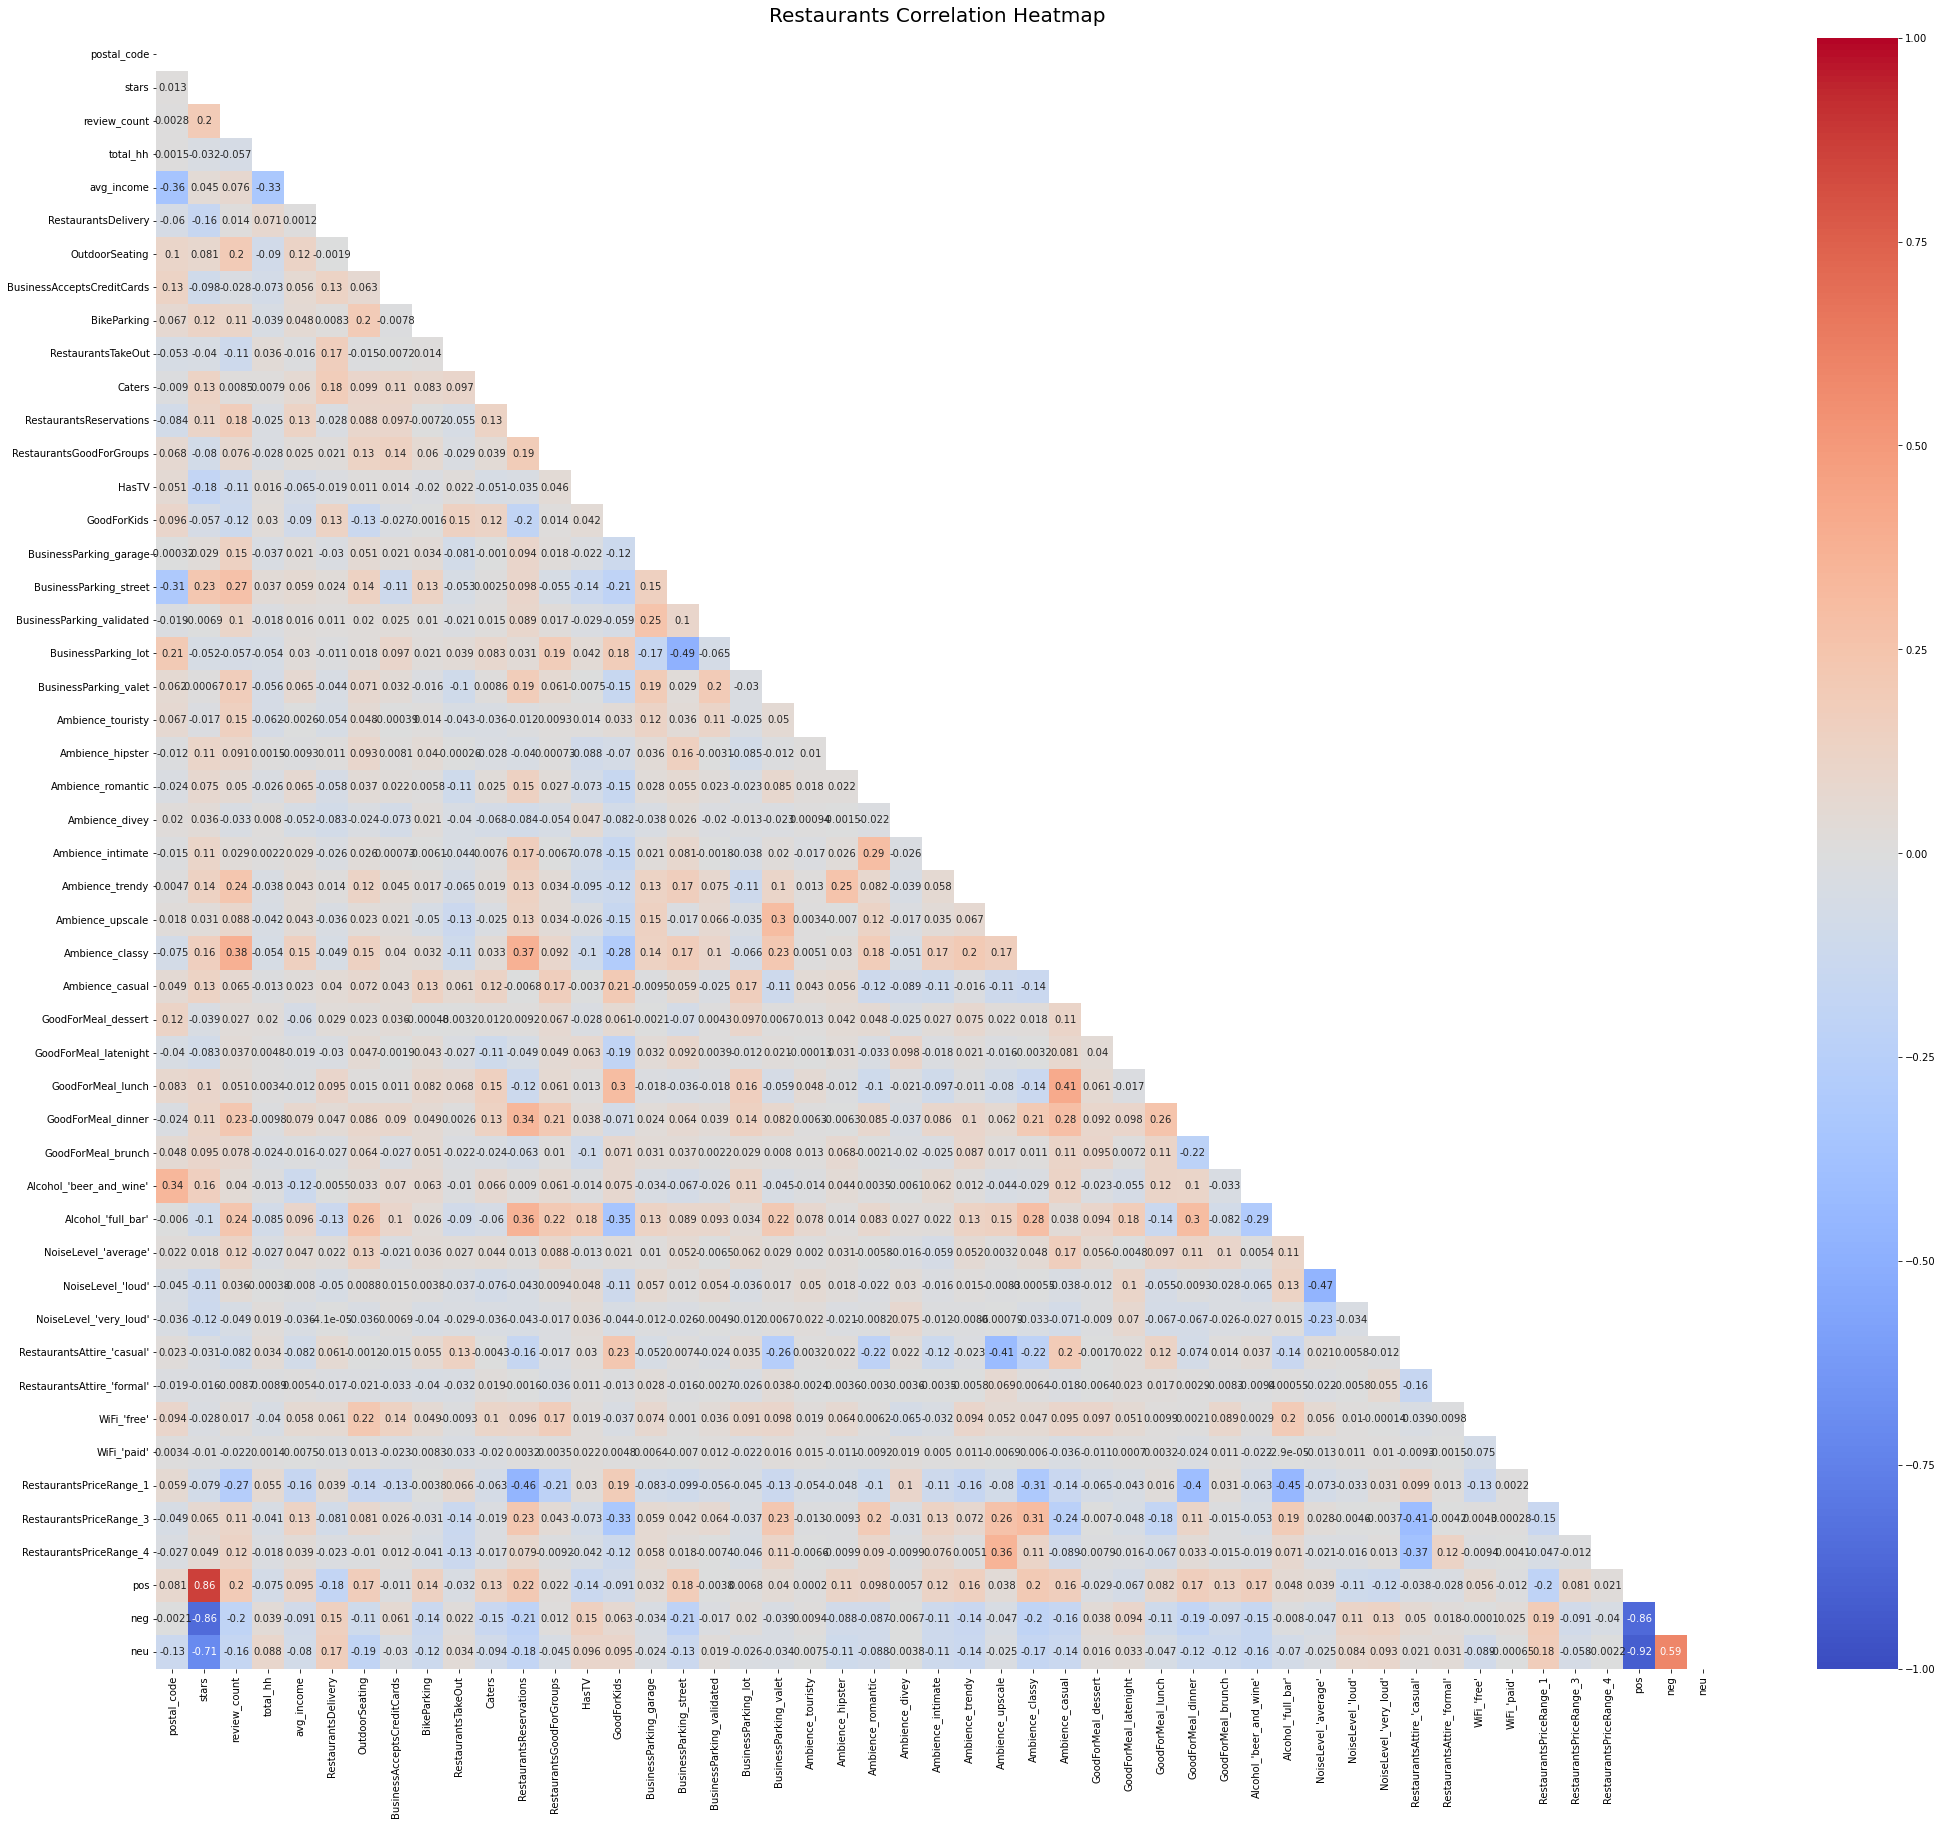

In [19]:
import warnings
warnings.filterwarnings("ignore")

corr = final_business

plt.figure(figsize=(35, 30))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr.corr(), dtype=np.bool))
heatmap = sns.heatmap(corr.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Restaurants Correlation Heatmap', fontdict={'fontsize':20}, pad=16)
# sns.set(font_scale=2);

In [5]:
# Split X and y dataset

cols_to_drop = ['business_id', 'business_name', 'city', 'state', 'postal_code', 'categories', 'stars']

X = final_business.drop(cols_to_drop, axis=1)
y = final_business['stars']

In [6]:
X.head()

,review_count,total_hh,avg_income,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsTakeOut,Caters,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,GoodForKids,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Ambience_touristy,Ambience_hipster,Ambience_romantic,Ambience_divey,Ambience_intimate,Ambience_trendy,Ambience_upscale,Ambience_classy,Ambience_casual,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_brunch,Alcohol_'beer_and_wine',Alcohol_'full_bar',NoiseLevel_'average',NoiseLevel_'loud',NoiseLevel_'very_loud',RestaurantsAttire_'casual',RestaurantsAttire_'formal',WiFi_'free',WiFi_'paid',RestaurantsPriceRange_1,RestaurantsPriceRange_3,RestaurantsPriceRange_4,pos,neg,neu
0,245,7625,162885,1,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0.394244,0.040224,0.565528
1,205,18239,128426,0,0,1,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0.389721,0.033341,0.576904
2,109,5665,135760,1,0,1,1,1,1,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0.315895,0.060658,0.623412
3,95,9689,109557,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0.393788,0.042313,0.563909
4,129,8805,114601,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0.379112,0.039575,0.581343


In [7]:
## Split training and testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5012, 47), (1253, 47), (5012,), (1253,))

#### PCA

In [8]:
from sklearn.preprocessing import scale

Xn = scale(X)

In [9]:
from sklearn.decomposition import PCA

#Create primary components

pca = PCA()
X_pca = pca.fit_transform(Xn)

In [10]:
ev = pca.explained_variance_ratio_
print(ev)

[9.53308307e-02 6.53157776e-02 5.00417470e-02 4.14923574e-02
 3.54782524e-02 3.26869933e-02 3.10207239e-02 3.01201883e-02
 2.87589006e-02 2.67783545e-02 2.57621396e-02 2.40732289e-02
 2.32066470e-02 2.24208709e-02 2.20944928e-02 2.17157138e-02
 2.12622518e-02 2.07459596e-02 2.00967731e-02 1.91007836e-02
 1.88333626e-02 1.85802845e-02 1.80243457e-02 1.79496259e-02
 1.71332780e-02 1.69537162e-02 1.58941546e-02 1.56871121e-02
 1.53312379e-02 1.50131775e-02 1.49139640e-02 1.45369085e-02
 1.40647833e-02 1.35784452e-02 1.31056155e-02 1.21315531e-02
 1.15016800e-02 1.13117102e-02 1.04834434e-02 9.90246478e-03
 8.80974104e-03 8.41371828e-03 8.30449719e-03 7.99570340e-03
 7.66914508e-03 6.37288075e-03 4.64630474e-07]


<function matplotlib.pyplot.show(close=None, block=None)>

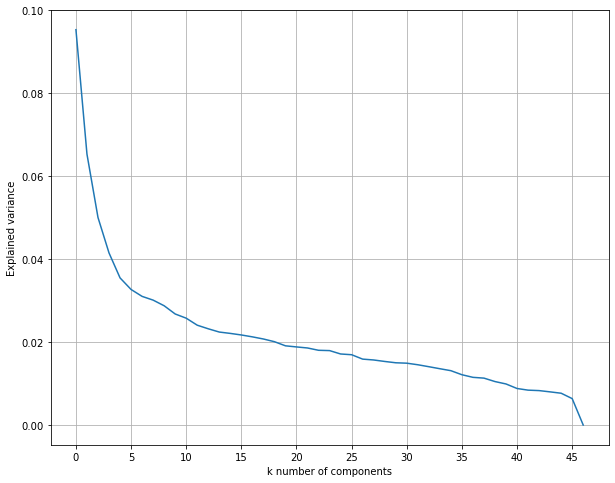

In [11]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))

plt.plot(ev) # Create a scree plot.
plt.xlabel('k number of components')
plt.ylabel('Explained variance')
plt.grid(True)
plt.xticks(np.arange(0, X.shape[1]+1, 5.0))
plt.show

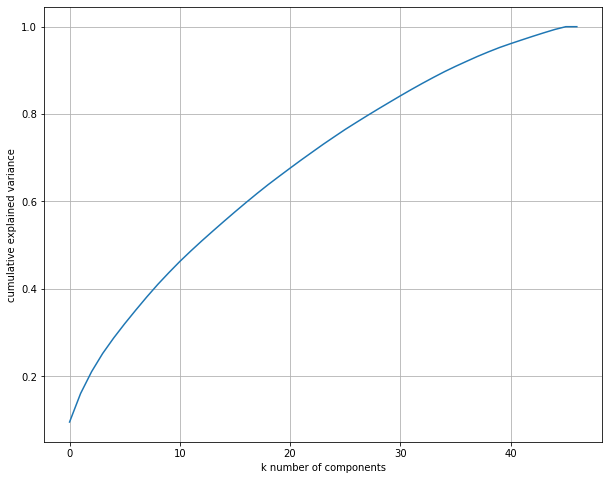

In [12]:
figure(figsize=(10, 8))

plt.plot(np.cumsum(ev))
plt.xlabel('k number of components')
plt.ylabel('cumulative explained variance') 
plt.grid(True)
plt.show()


In [13]:
# Create a scree plot to determine the number of primary components to use.

pca = PCA(n_components=30)
X_pca=pca.fit_transform(Xn) 
X_pca[0:5]

array([[ 3.70672682,  0.80926223,  0.32965165, -0.79543084, -0.5602372 ,
        -1.07005438, -2.08232637, -0.35017575,  0.62879436, -0.07455728,
         0.5536227 ,  2.05794925,  0.30437669,  0.95127098, -0.18497685,
        -0.44034592, -0.32447178, -0.20680798, -1.00801374,  0.94644288,
         0.47913625,  1.19913553, -0.99506835,  2.26469795, -1.55906483,
         2.10038955,  1.36105022,  0.35766486, -1.22986725,  0.43142846],
       [-0.49340427, -1.24355981,  2.87781207, -0.2155818 , -0.50123458,
        -0.51594345,  1.78725497, -0.1388916 , -1.40056148,  0.9395513 ,
        -0.2316335 ,  0.69822563, -0.82812708,  0.38406669, -0.27500291,
        -0.33806604,  0.5690277 ,  0.31433295, -0.23621946, -1.46452133,
         0.35659487, -0.25975236,  0.47892284,  1.29046275,  0.59666819,
        -0.92950841, -0.63039686,  0.42570362,  0.20561159, -0.51176462],
       [-0.95389892, -0.24962275, -0.40951425, -0.7657876 , -0.26842838,
        -0.05155757, -0.24916452, -0.94209305, -0

In [14]:
loadings = pd.DataFrame(pca.components_.T)
print(loadings)

          0         1         2         3         4         5         6   \
0   0.237802 -0.037247 -0.025110 -0.194829  0.158970 -0.001579  0.130159   
1  -0.073604  0.013270  0.038126 -0.034929  0.019139 -0.216263  0.255568   
2   0.124278  0.002741 -0.049520  0.039823  0.011361  0.024434 -0.305866   
3  -0.073768 -0.040395 -0.151440 -0.031216  0.279732 -0.335154 -0.018495   
4   0.164388 -0.085140 -0.090909 -0.161922  0.001609  0.116569 -0.252788   
5   0.046913 -0.017817 -0.213229  0.084757 -0.013559 -0.063007 -0.089701   
6   0.061720 -0.145226  0.009463 -0.139647 -0.000285  0.070703 -0.060008   
7  -0.097711 -0.120378 -0.054888 -0.010666  0.024439 -0.218041 -0.099793   
8   0.049207 -0.168516 -0.088383  0.132671  0.156080 -0.219025  0.004451   
9   0.273822  0.028997 -0.142242  0.105985 -0.100428 -0.237127  0.022061   
10  0.101236 -0.068927 -0.305544  0.029391 -0.062338  0.050361 -0.020129   
11 -0.069607  0.050196 -0.182028 -0.019045 -0.210609  0.125829  0.053379   
12 -0.212773

In [15]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size =.2, random_state=1234, stratify=y)

X_pca_train.shape, X_pca_test.shape, y_pca_train.shape, y_pca_test.shape

((5012, 30), (1253, 30), (5012,), (1253,))

#### Modeling

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

import time

#### Random Forest (Original)

In [16]:
t_start = time.time()

rfrm = RandomForestRegressor()
rfrm.fit(X_train, y_train)
y_pred = rfrm.predict(X_test)

t_end = time.time()
execution_time = t_end - t_start
print (f'Execution time is {execution_time} seconds')

Execution time is 4.572277069091797 seconds


In [17]:
rfrm_mse = metrics.mean_squared_error(y_test,y_pred)
rfrm_rmse = np.sqrt(rfrm_mse)
rfrm_rsquared = rfrm.score(X_test, y_test)
print('\n', '**Evaluation of Errors**')
print (' mse: ', rfrm_mse,'\n','rmse:', rfrm_rmse)
print (' R^2: ', rfrm_rsquared)


 **Evaluation of Errors**
 mse:  0.07663148443735036 
 rmse: 0.27682392316660487
 R^2:  0.8291360805379612


#### Random Forest (Feature Selection)

In [18]:
fn = X.columns
print(f'Originally, we have {len(fn)} features.')

Originally, we have 47 features.


In [19]:
importances = rfrm.feature_importances_

In [20]:
# Draw a bar chart to see the sorted importance values with feature names.
df_importances = pd.DataFrame(data=importances, index=fn, 
                              columns=['importance_value'])
df_importances.sort_values(by = 'importance_value', ascending=False, 
                           inplace=True)
df_importances

,importance_value
neg,0.588973
pos,0.260982
review_count,0.027898
neu,0.020334
avg_income,0.018336
total_hh,0.016451
Alcohol_'full_bar',0.011180
RestaurantsPriceRange_1,0.003925
RestaurantsGoodForGroups,0.003426
BusinessParking_street,0.003362


<BarContainer object of 47 artists>

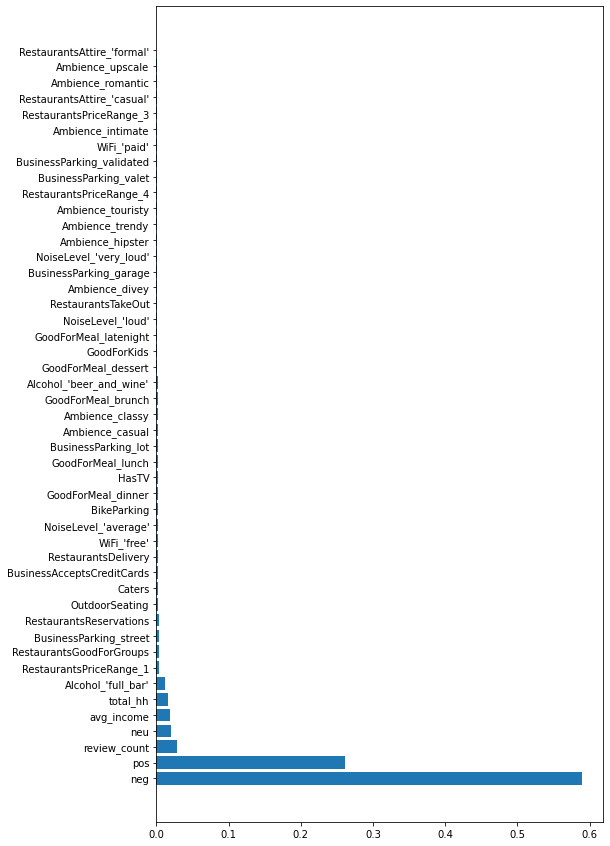

In [21]:
figure(figsize=(8, 15))

plt.barh(df_importances.index,df_importances.importance_value)

In [22]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=RandomForestRegressor(),threshold=0.010692)
X_reduced_rfrm = selector.fit_transform(X,y)
selector.threshold_ 
selected_TF = selector.get_support()
print(f'\n** {selected_TF.sum()} features are selected.')  
#This shows how many features are selected.


** 6 features are selected.


In [23]:
# Show those selected features.
selected_features = []
for i,j in zip(selected_TF, fn):
    if i: selected_features.append(j)
print(f'Selected Features: {selected_features}') 

Selected Features: ['review_count', 'total_hh', 'avg_income', 'pos', 'neg', 'neu']


In [24]:
# Now, we are ready to build a model using those reduced number of features.
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X_reduced_rfrm, y, test_size =.2, random_state=1234, stratify=y)

X_reduced_train.shape, X_reduced_test.shape, y_reduced_train.shape, y_reduced_test.shape

((5012, 6), (1253, 6), (5012,), (1253,))

In [25]:
# Build a model with the reduced number of features.

t_start = time.time()

rfrm2 = RandomForestRegressor()
rfrm2.fit(X_reduced_train, y_reduced_train)
y_pred2 = rfrm2.predict(X_reduced_test)

t_end = time.time()
execution_time = t_end - t_start
print (f'Execution time is {execution_time} seconds')

Execution time is 2.592890501022339 seconds


In [26]:
rfrm_reduced_mse = metrics.mean_squared_error(y_reduced_test,y_pred2)
rfrm_reduced_rmse = np.sqrt(rfrm_reduced_mse)
rfrm_reduced_rsquared = rfrm2.score(X_reduced_test, y_reduced_test)
print('\n', '**Evaluation of Errors**')
print (' mse: ', rfrm_reduced_mse,'\n','rmse:', rfrm_reduced_rmse)
print (' R^2: ', rfrm_reduced_rsquared)


 **Evaluation of Errors**
 mse:  0.08895401037509976 
 rmse: 0.2982515890571243
 R^2:  0.801660753720851


#### Random Forest (PCA)

In [314]:
t_start = time.time()

rfrmPCA = RandomForestRegressor()
rfrmPCA.fit(X_pca_train, y_pca_train)
y_predpca = rfrmPCA.predict(X_pca_test)

t_end = time.time()
execution_time = t_end - t_start
print (f'Execution time is {execution_time} seconds')

Execution time is 11.20918321609497 seconds


In [315]:
rfrm_pca_mse = metrics.mean_squared_error(y_pca_test,y_predpca)
rfrm_pca_rmse = np.sqrt(rfrm_pca_mse)
rfrm_pca_rsquared = rfrmPCA.score(X_pca_test, y_pca_test)
print('\n', '**Evaluation of Errors**')
print (' mse: ', rfrm_pca_mse,'\n','rmse:', rfrm_pca_rmse)
print (' R^2: ', rfrm_pca_rsquared)


 **Evaluation of Errors**
 mse:  0.1041001795690343 
 rmse: 0.32264559437412793
 R^2:  0.7678895974877156


#### Decision Tree (Original)

In [29]:
t_start = time.time()

# Create Decision Tree classifer object
dtm = DecisionTreeRegressor()

# Train Decision Tree Classifer
dtm.fit(X_train,y_train)

#Predict the response for test dataset
y_predDT = dtm.predict(X_test)

t_end = time.time()
execution_time = t_end - t_start
print (f'Execution time is {execution_time} seconds')

Execution time is 0.09132528305053711 seconds


In [30]:
dtm_mse = metrics.mean_squared_error(y_test,y_predDT)
dtm_rmse = np.sqrt(dtm_mse)
dtm_rsquared = dtm.score(X_test, y_test)
print('\n', '**Evaluation of Errors**')
print (' mse: ', dtm_mse,'\n','rmse:', dtm_rmse)
print (' R^2: ', dtm_rsquared)


 **Evaluation of Errors**
 mse:  0.15203511572226655 
 rmse: 0.38991680615519325
 R^2:  0.661009884397989


#### Decision Tree (Feature Selection)

In [31]:
fn = X.columns
print(f'Originally, we have {len(fn)} features.')

Originally, we have 47 features.


In [32]:
importances = dtm.feature_importances_
# Draw a bar chart to see the sorted importance values with feature names.
df_importances = pd.DataFrame(data=importances, index=fn, 
                              columns=['importance_value'])
df_importances.sort_values(by = 'importance_value', ascending=False, 
                           inplace=True)
df_importances

,importance_value
neg,0.636959
pos,0.213104
review_count,0.029203
avg_income,0.019068
neu,0.018948
total_hh,0.015237
Alcohol_'full_bar',0.012816
BusinessParking_street,0.004282
RestaurantsPriceRange_1,0.003691
RestaurantsGoodForGroups,0.003673


<BarContainer object of 47 artists>

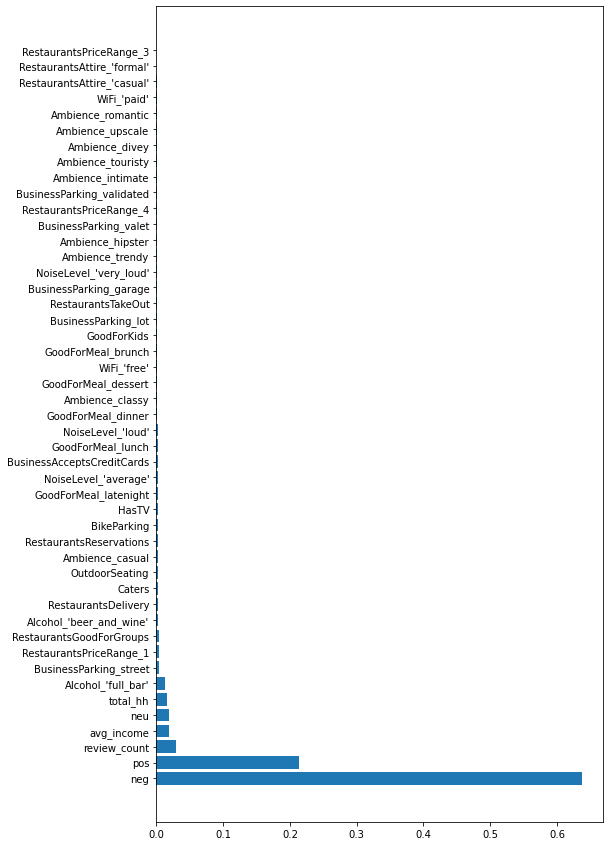

In [33]:
figure(figsize=(8, 15))

plt.barh(df_importances.index,df_importances.importance_value)

In [34]:
selector = SelectFromModel(estimator=DecisionTreeRegressor(),threshold=0.01)
X_reduced_dtm = selector.fit_transform(X,y)
selector.threshold_ 
selected_TF = selector.get_support()
print(f'\n** {selected_TF.sum()} features are selected.')  
#This shows how many features are selected.


** 7 features are selected.


In [35]:
# Show those selected features.
selected_features = []
for i,j in zip(selected_TF, fn):
    if i: selected_features.append(j)
print(f'Selected Features: {selected_features}') 

Selected Features: ['review_count', 'total_hh', 'avg_income', "Alcohol_'full_bar'", 'pos', 'neg', 'neu']


In [36]:
# Now, we are ready to build a model using those reduced number of features.
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X_reduced_dtm, y, test_size =.2, random_state=1234, stratify=y)

X_reduced_train.shape, X_reduced_test.shape, y_reduced_train.shape, y_reduced_test.shape

((5012, 7), (1253, 7), (5012,), (1253,))

In [37]:
# Build a model with the reduced number of features.

t_start = time.time()

dtm2 = RandomForestRegressor()
dtm2.fit(X_reduced_train, y_reduced_train)
y_pred_dtm2 = dtm2.predict(X_reduced_test)

t_end = time.time()
execution_time = t_end - t_start
print (f'Execution time is {execution_time} seconds')

Execution time is 3.36409330368042 seconds


In [38]:
dtm_reduced_mse = metrics.mean_squared_error(y_reduced_test,y_pred_dtm2)
dtm_reduced_rmse = np.sqrt(dtm_reduced_mse)
dtm_reduced_rsquared = dtm2.score(X_reduced_test, y_reduced_test)
print('\n', '**Evaluation of Errors**')
print (' mse: ', dtm_reduced_mse,'\n','rmse:', dtm_reduced_rmse)
print (' R^2: ', dtm_reduced_rsquared)


 **Evaluation of Errors**
 mse:  0.08371604150039905 
 rmse: 0.2893372452699428
 R^2:  0.8133397639673928


#### Decision Tree (PCA)

In [316]:
t_start = time.time()

dtmPCA = DecisionTreeRegressor()
dtmPCA.fit(X_pca_train,y_pca_train)
y_predDTPCA = dtmPCA.predict(X_pca_test)

t_end = time.time()
execution_time = t_end - t_start
print (f'Execution time is {execution_time} seconds')

Execution time is 0.1736459732055664 seconds


In [317]:
dtm_pca_mse = metrics.mean_squared_error(y_pca_test,y_predDTPCA)
dtm_pca_rmse = np.sqrt(dtm_pca_mse)
dtm_pca_rsquared = dtmPCA.score(X_pca_test, y_pca_test)
print('\n', '**Evaluation of Errors**')
print (' mse: ', dtm_pca_mse,'\n','rmse:', dtm_pca_rmse)
print (' R^2: ', dtm_pca_rsquared)


 **Evaluation of Errors**
 mse:  0.22605746209098165 
 rmse: 0.47545500532750906
 R^2:  0.49596351577811226


#### Gradient Boosting (Original)

In [41]:
t_start = time.time()

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predGB = gbr.predict(X_test)

t_end = time.time()
execution_time = t_end - t_start
print (f'Execution time is {execution_time} seconds')

Execution time is 2.1929805278778076 seconds


In [42]:
gbr_mse = metrics.mean_squared_error(y_test,y_predGB)
gbr_rmse = np.sqrt(gbr_mse)
gbr_rsquared = gbr.score(X_test, y_test)
print('\n', '**Evaluation of Errors**')
print (' mse: ', gbr_mse,'\n','rmse:', gbr_rmse)
print (' R^2: ', gbr_rsquared)


 **Evaluation of Errors**
 mse:  0.07305213100117951 
 rmse: 0.27028157725079877
 R^2:  0.8371169041085141


#### Gradient Boosting (Feature Selection)

In [43]:
importances = gbr.feature_importances_
# Draw a bar chart to see the sorted importance values with feature names.

pd.set_option('display.float_format', lambda x: '%.6f' % x)

df_importances = pd.DataFrame(data=importances, index=fn, 
                              columns=['importance_value'])
df_importances.sort_values(by = 'importance_value', ascending=False, 
                           inplace=True)
df_importances

,importance_value
neg,0.572251
pos,0.372047
Alcohol_'full_bar',0.014789
review_count,0.008571
neu,0.004902
avg_income,0.004129
RestaurantsPriceRange_1,0.003929
RestaurantsGoodForGroups,0.003271
BusinessParking_street,0.003122
RestaurantsReservations,0.002312


<BarContainer object of 47 artists>

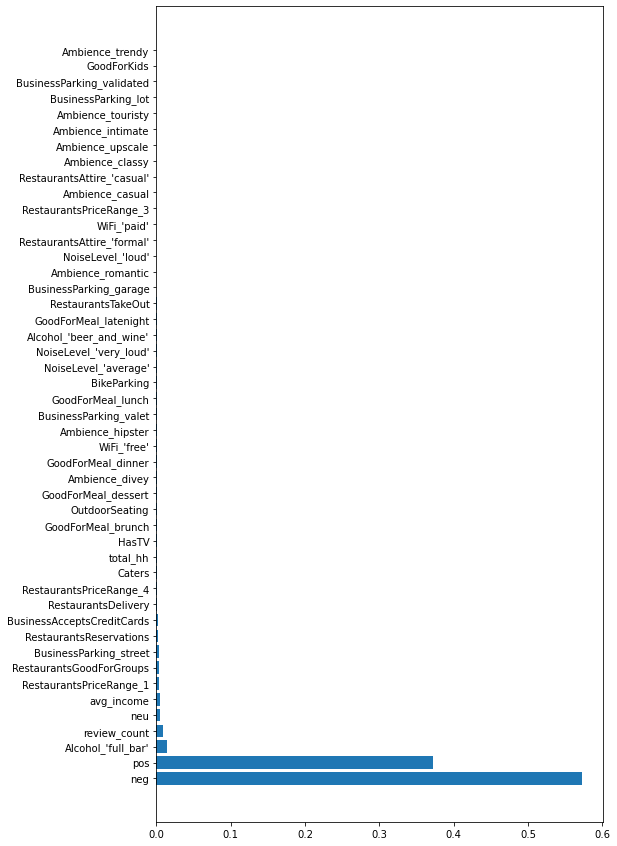

In [44]:
figure(figsize=(8, 15))

plt.barh(df_importances.index,df_importances.importance_value)

In [45]:
selector = SelectFromModel(estimator=GradientBoostingRegressor(),threshold=0.004)
X_reduced_gbr = selector.fit_transform(X,y)
selector.threshold_ 
selected_TF = selector.get_support()
print(f'\n** {selected_TF.sum()} features are selected.')  
#This shows how many features are selected.


** 5 features are selected.


In [46]:
# Show those selected features.
selected_features = []
for i,j in zip(selected_TF, fn):
    if i: selected_features.append(j)
print(f'Selected Features: {selected_features}') 

Selected Features: ['review_count', "Alcohol_'full_bar'", 'pos', 'neg', 'neu']


In [47]:
# Now, we are ready to build a model using those reduced number of features.
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test = train_test_split(X_reduced_gbr, y, test_size =.2, random_state=1234, stratify=y)

X_reduced_train.shape, X_reduced_test.shape, y_reduced_train.shape, y_reduced_test.shape

((5012, 5), (1253, 5), (5012,), (1253,))

In [48]:
# Build a model with the reduced number of features.

t_start = time.time()

gbr2 = GradientBoostingRegressor()
gbr2.fit(X_reduced_train, y_reduced_train)
y_pred_gbr2 = gbr2.predict(X_reduced_test)

t_end = time.time()
execution_time = t_end - t_start
print (f'Execution time is {execution_time} seconds')

Execution time is 0.809300422668457 seconds


In [49]:
gbr_reduced_mse = metrics.mean_squared_error(y_reduced_test,y_pred_gbr2)
gbr_reduced_rmse = np.sqrt(gbr_reduced_mse)
gbr_reduced_rsquared = gbr2.score(X_reduced_test, y_reduced_test)
print('\n', '**Evaluation of Errors**')
print (' mse: ', gbr_reduced_mse,'\n','rmse:', gbr_reduced_rmse)
print (' R^2: ', gbr_reduced_rsquared)


 **Evaluation of Errors**
 mse:  0.07926669437937942 
 rmse: 0.2815434147327538
 R^2:  0.8232603976824565


#### Gradient Boosting (PCA)

In [318]:
t_start = time.time()

gbrPCA = GradientBoostingRegressor()
gbrPCA.fit(X_pca_train,y_pca_train)
y_predGBRPCA = gbrPCA.predict(X_pca_test)

t_end = time.time()
execution_time = t_end - t_start
print (f'Execution time is {execution_time} seconds')

Execution time is 6.281964063644409 seconds


In [319]:
gbr_pca_mse = metrics.mean_squared_error(y_pca_test,y_predGBRPCA)
gbr_pca_rmse = np.sqrt(gbr_pca_mse)
gbr_pca_rsquared = gbrPCA.score(X_pca_test, y_pca_test)
print('\n', '**Evaluation of Errors**')
print (' mse: ', gbr_pca_mse,'\n','rmse:', gbr_pca_rmse)
print (' R^2: ', gbr_pca_rsquared)


 **Evaluation of Errors**
 mse:  0.09535334392605324 
 rmse: 0.3087933676846918
 R^2:  0.787392268378449


#### SVR (Original)

In [52]:
scaler = StandardScaler()
Xn = scaler.fit_transform(X)

In [53]:
## Split training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.2, stratify=y, random_state=1234)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5012, 47), (1253, 47), (5012,), (1253,))

In [54]:
t_start = time.time()

svr = SVR(kernel='rbf') 
svr.fit(X_train, y_train)  
y_predSVR = svr.predict(X_test)

t_end = time.time()
execution_time = t_end - t_start
print (f'Execution time is {execution_time} seconds')

Execution time is 5.237117052078247 seconds


In [55]:
svr_mse = metrics.mean_squared_error(y_test,y_predSVR)
svr_rmse = np.sqrt(svr_mse)
svr_rsquared = svr.score(X_test, y_test)
print('\n', '**Evaluation of Errors**')
print (' mse: ', svr_mse,'\n','rmse:', svr_rmse)
print (' R^2: ', svr_rsquared)


 **Evaluation of Errors**
 mse:  0.08426982201097347 
 rmse: 0.29029264890963646
 R^2:  0.8121050089674973


#### SVR (Feature Selection)

In [56]:
importances = svr.feature_importances_
# Draw a bar chart to see the sorted importance values with feature names.

# pd.set_option('display.float_format', lambda x: '%.6f' % x)

df_importances = pd.DataFrame(data=importances, index=fn, 
                              columns=['importance_value'])
df_importances.sort_values(by = 'importance_value', ascending=False, 
                           inplace=True)
df_importances

AttributeError: 'SVR' object has no attribute 'feature_importances_'

#### SVR (PCA)

In [320]:
t_start = time.time()

svrPCA = SVR(kernel='rbf') 
svrPCA.fit(X_pca_train,y_pca_train)
y_predSVRPCA = svrPCA.predict(X_pca_test)

t_end = time.time()
execution_time = t_end - t_start
print (f'Execution time is {execution_time} seconds')

Execution time is 2.901315927505493 seconds


In [321]:
svr_pca_mse = metrics.mean_squared_error(y_pca_test,y_predSVRPCA)
svr_pca_rmse = np.sqrt(svr_pca_mse)
svr_pca_rsquared = svrPCA.score(X_pca_test, y_pca_test)
print('\n', '**Evaluation of Errors**')
print (' mse: ', svr_pca_mse,'\n','rmse:', svr_pca_rmse)
print (' R^2: ', svr_pca_rsquared)


 **Evaluation of Errors**
 mse:  0.09093706411999113 
 rmse: 0.3015577293321979
 R^2:  0.7972391724629149


#### Neural Network (Original)

In [325]:
scaler = StandardScaler()
Xn = scaler.fit_transform(X)

In [326]:
## Split training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.2, stratify=y, random_state=1234)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5012, 47), (1253, 47), (5012,), (1253,))

In [327]:
t_start = time.time()

nnr = MLPRegressor(hidden_layer_sizes=(100), max_iter=1000, random_state=1234)
nnr.fit(X_train, y_train)
y_predNNR = nnr.predict(X_test)

t_end = time.time()
execution_time = t_end - t_start
print (f'Execution time is {execution_time} seconds')

Execution time is 9.542833805084229 seconds


In [328]:
nnr_mse = metrics.mean_squared_error(y_test,y_predNNR)
nnr_rmse = np.sqrt(nnr_mse)
nnr_rsquared = nnr.score(X_test, y_test)
print('\n', '**Evaluation of Errors**')
print (' mse: ', nnr_mse,'\n','rmse:', nnr_rmse)
print (' R^2: ', nnr_rsquared)


 **Evaluation of Errors**
 mse:  0.12263994331936283 
 rmse: 0.3501998619636547
 R^2:  0.7265518011036307


#### Neural Network (Feature Selection)

In [75]:
importances = nnr.feature_importances_
# Draw a bar chart to see the sorted importance values with feature names.

pd.set_option('display.float_format', lambda x: '%.6f' % x)

df_importances = pd.DataFrame(data=importances, index=fn, 
                              columns=['importance_value'])
df_importances.sort_values(by = 'importance_value', ascending=False, 
                           inplace=True)
df_importances

AttributeError: 'MLPRegressor' object has no attribute 'feature_importances_'

#### Neural Network (PCA)

In [322]:
t_start = time.time()

nnrPCA = MLPRegressor(hidden_layer_sizes=(100), max_iter=1000, random_state=1234)
nnrPCA.fit(X_pca_train,y_pca_train)
y_predNNRPCA = nnrPCA.predict(X_pca_test)

t_end = time.time()
execution_time = t_end - t_start
print (f'Execution time is {execution_time} seconds')

Execution time is 8.628374338150024 seconds


In [324]:
nnr_pca_mse = metrics.mean_squared_error(y_pca_test,y_predNNRPCA)
nnr_pca_rmse = np.sqrt(nnr_pca_mse)
nnr_pca_rsquared = nnrPCA.score(X_pca_test, y_pca_test)
print('\n', '**Evaluation of Errors**')
print (' mse: ', nnr_pca_mse,'\n','rmse:', nnr_pca_rmse)
print (' R^2: ', nnr_pca_rsquared)


 **Evaluation of Errors**
 mse:  0.11143937869796178 
 rmse: 0.33382537156118286
 R^2:  0.7515255098272953


#### Summary

In [332]:
rsquared_dict = {
    "Decision Tree Original": dtm_rsquared,
    "Decision Tree Feature Selection": dtm_reduced_rsquared,
    "Decision Tree PCA": dtm_pca_rsquared,
    "Random Forest Original": rfrm_rsquared,
    "Random Forest Feature Selection": rfrm_reduced_rsquared, 
    "Random Forest PCA": rfrm_pca_rsquared,
    "Gradient Boosting Original": gbr_rsquared,
    "Gradient Boosting Feature Selection": gbr_reduced_rsquared,
    "Gradient Boosting  PCA": gbr_pca_rsquared,
    "SVR Original": svr_rsquared,
    "SVR PCA": svr_pca_rsquared,
    "Neural Network Original": nnr_rsquared,
    "Neutral Network PCA": nnr_pca_rsquared

}

rsquared = pd.DataFrame(rsquared_dict.items(), columns=['Models', 'RSquared'])
rsquared.sort_values(by="RSquared", ascending=False, inplace=True)
rsquared.reset_index(drop=True)

,Models,RSquared
0,Gradient Boosting Original,0.837117
1,Random Forest Original,0.829136
2,Gradient Boosting Feature Selection,0.823260
3,Decision Tree Feature Selection,0.813340
4,SVR Original,0.812105
5,Random Forest Feature Selection,0.801661
6,SVR PCA,0.797239
7,Gradient Boosting PCA,0.787392
8,Random Forest PCA,0.767890
9,Neutral Network PCA,0.751526


#### K-Fold Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score

In [245]:
dtm_mean_score = np.mean(cross_val_score(dtm,X,y,cv=5))
rfrm_mean_score = np.mean(cross_val_score(rfrm,X,y,cv=5))
gbr_mean_score = np.mean(cross_val_score(gbr,X,y,cv=5))
svr_mean_score = np.mean(cross_val_score(svr,Xn,y,cv=5))
nnr_mean_score = np.mean(cross_val_score(nnr,Xn,y,cv=5))

# Print the scores (R²)
print('\n  ** Mean Scores (R²) **')
print(f'Mean Score for Decision Tree: {dtm_mean_score:.4f}')
print(f'Mean Score for Random Forest: {rfrm_mean_score:.4f}')
print(f'Mean Score for Gradient Boosting: {gbr_mean_score:.4f}')
print(f'Mean Score for Support Vector Regression: {svr_mean_score:.4f}')
print(f'Mean Score for Neural Network: {nnr_mean_score:.4f}')


  ** Mean Scores (R²) **
Mean Score for Decision Tree: 0.6440
Mean Score for Random Forest: 0.8257
Mean Score for Gradient Boosting: 0.8361
Mean Score for Support Vector Regression: 0.8042
Mean Score for Neural Network: 0.7321


In [330]:
dtm_reduced_mean_score = np.mean(cross_val_score(dtm2,X_reduced_dtm,y,cv=5))
rfrm_reduced_mean_score = np.mean(cross_val_score(rfrm2,X_reduced_rfrm,y,cv=5))
gbr_reduced_mean_score = np.mean(cross_val_score(gbr2,X_reduced_gbr,y,cv=5))

# Print the scores (R²)
print('\n  ** Mean Scores (R²) **')
print(f'Mean Score for Decision Tree: {dtm_reduced_mean_score:.4f}')
print(f'Mean Score for Random Forest: {rfrm_reduced_mean_score:.4f}')
print(f'Mean Score for Gradient Boosting: {gbr_reduced_mean_score:.4f}')


  ** Mean Scores (R²) **
Mean Score for Decision Tree: 0.8097
Mean Score for Random Forest: 0.7992
Mean Score for Gradient Boosting: 0.8219


In [329]:
dtm_PCA_mean_score = np.mean(cross_val_score(dtmPCA,X_pca,y,cv=5))
rfrm_PCA_mean_score = np.mean(cross_val_score(rfrmPCA,X_pca,y,cv=5))
gbr_PCA_mean_score = np.mean(cross_val_score(gbrPCA,X_pca,y,cv=5))
svr_PCA_mean_score = np.mean(cross_val_score(svrPCA,X_pca,y,cv=5))
nnr_PCA_mean_score = np.mean(cross_val_score(nnrPCA,X_pca,y,cv=5))

# Print the scores (R²)
print('\n  ** Mean Scores (R²) **')
print(f'Mean Score for Decision Tree: {dtm_PCA_mean_score:.4f}')
print(f'Mean Score for Random Forest: {rfrm_PCA_mean_score:.4f}')
print(f'Mean Score for Gradient Boosting: {gbr_PCA_mean_score:.4f}')
print(f'Mean Score for Support Vector Regression: {svr_PCA_mean_score:.4f}')
print(f'Mean Score for Neural Network: {nnr_PCA_mean_score:.4f}')


  ** Mean Scores (R²) **
Mean Score for Decision Tree: 0.5045
Mean Score for Random Forest: 0.7693
Mean Score for Gradient Boosting: 0.7805
Mean Score for Support Vector Regression: 0.7915
Mean Score for Neural Network: 0.7171


In [249]:
gbr_mean_score_10 = np.mean(cross_val_score(gbr,X,y,cv=10))
print(f'Mean Score for Gradient Boosting: {gbr_mean_score_10:.4f}')

Mean Score for Gradient Boosting: 0.8368


In [250]:
gbr_mean_score_15 = np.mean(cross_val_score(gbr,X,y,cv=15))
print(f'Mean Score for Gradient Boosting: {gbr_mean_score_15:.4f}')

Mean Score for Gradient Boosting: 0.8366
